<b>Group Number:</b> 7
<br><b>Name Group Member 1:</b>   Paraa Afifi
<br><b>u-Kürzel Group Member 1:</b>   uppns
<br><b>Name Group Member 2:</b>   Dan-Jason Bräuninger
<br><b>u-Kürzel Group Member 2:</b>   uuuab
<br><b>Name Group Member 3:</b> Sami Shahzad
<br><b>u-Kürzel Group Member 3:</b>uvoei

# Convolutional Neural Networks (CNNs) - Part 2
In the following, CNNs will be examined by some common tasks in the field of image processing. Be aware that CNNs can be used in various tasks where many datapoints relate locally to each other.

## 2.1 Some Imports and Preparation
The following initalizations might take some time ...

In [1]:
from ipywidgets import widgets
from IPython.display import display

import matplotlib.pyplot as plt
import numpy as np

# For some convolving operations
from scipy import signal

# DeepLearning Library Keras
# Documentation https://keras.io/
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os, sys
from typing import *

from lama.test_functions import CNN_Tests

test_func = CNN_Tests()

# allow memory to grow, not consume all at once
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
# Size for some plots with matplotlib
figure_inches = 3

## 2.3 Cifar-10 classification task
Beside the MNIST dataset Cifar10 is as well a small dataset used in the beginning of CNNs. There are 10 different classes of simple objects or animals. The images are of size 32x32x3. In this section, you should tune a given CNN in order to classify images with high accuracy. 

See also: [Cifar-10](https://www.cs.toronto.edu/~kriz/cifar.html)


<div class="alert alert-block alert-success">
<b>Task:</b> Load the dataset, define number of classes, transform labels and define all corresponding classes (like airplane,...) according to the comments in the code cells.

</div>

In [2]:
# Load the dataset from Keras, Tip: cifar10 is already imported, train + test set required
x_train: np.ndarray
y_train: np.ndarray
x_test: np.ndarray
y_test: np.ndarray

# STUDENT CODE HERE (1 pts)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# STUDENT CODE until HERE

In [3]:
# How many classes are in Cifar-10? 
num_classes: int

### STUDENT CODE HERE (1 pts)

num_classes = len(np.unique(y_train))

### STUDENT CODE until HERE

print(f'In diesem Datensatz haben wir {num_classes} Klassen')

In diesem Datensatz haben wir 10 Klassen


In [4]:
# Transform the labels into categorical vectors
# Use the keras.utils.to_categorical function
y_train_categorical: np.ndarray
y_test_categorical: np.ndarray

### STUDENT CODE HERE (1 pts)
'''
*) Was machen wir hier? 
1) Wir wandeln Ausgabe der 10 Klassen in one-hot-coding, damit es passend zu der Modell Architektur ist. Also wir haben eine Matrix mit 10x10 Einträgen und die Diagonale beschreibt die jeweiligen Klassen.
'''
y_train_categorical = keras.utils.to_categorical(y_train, num_classes)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes)
print(y_train_categorical)
### STUDENT CODE until HERE

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [5]:
# What classes are there? Define them in a list of strings named classes.
classes: List[str]

### STUDENT CODE HERE (2 pts)
'''
*) Die Klassen kann man unter den Link https://www.cs.toronto.edu/~kriz/cifar.html finden, da sind alle gelistet.
'''
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck']
### STUDENT CODE until HERE

# Sanity check - compare your results
test_func.test_classes(classes)

Your data looks alright, you can continue with the workbook.


<div class="alert alert-block alert-success">
<b>Task:</b> Check if you defined everything as required.

</div>

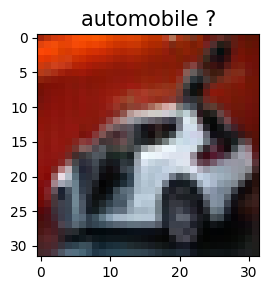

In [6]:
# Image in the training set
number_sample = 6  # test multiple ones

fig, ax = plt.subplots(figsize=(figure_inches, figure_inches))
ax.set_title(classes[y_test[number_sample].item()]+' ?', fontsize = 15)
ax.imshow(x_test[number_sample,:,:,:], interpolation='nearest')
plt.tight_layout()


<div class="alert alert-block alert-success">
<b>Task:</b> Find a picture of a horse (not by try and error) and plot it using the code above. Use the code cell below.

</div>

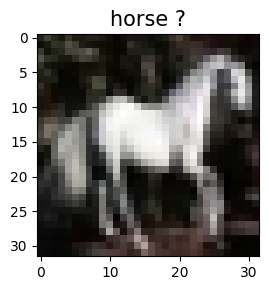

In [7]:
### STUDENT CODE HERE (1 pts)

# Image in the training set
number_sample = 13 

fig, ax = plt.subplots(figsize=(figure_inches, figure_inches))
ax.set_title(classes[y_test[number_sample].item()]+' ?', fontsize = 15)
ax.imshow(x_test[number_sample,:,:,:], interpolation='nearest')
plt.tight_layout()

### STUDENT CODE until HERE


<div class="alert alert-block alert-success">
<b>Task:</b> Preprocess the data to ensure values between 0 and 1 by dividing rgb values by their maximum value.

</div>

In [8]:
# Data Preprocessing

### STUDENT CODE HERE (1 pts)
'''
*) Warum machen wir das?
1) Weil das NN besser bei kleinen Werten lernt -> Werte zwischen 0 und 1 sind viel handlicher als 0 bis 255
2) Gradient Descent funktioniert besser -> Mit normalisierten Daten konvergiert das Training schneller und stabiler
3) Vermeidung von numerischen Problemen -> Aktivierungsfunktionen wie Sigmoid oder Tanh arbeiten am besten im Bereich [-1, 1] oder [0, 1]
'''

x_train = x_train / 255.0
x_test = x_test / 255.0

print(f'Anzahl Trainingsbilder, Bildgröße (Höhe, Breite), RGB-Kanäle {x_train.shape}')  
print(f'Anzahl Trainingsbilder, Bildgröße (Höhe, Breite), RGB-Kanäle {x_test.shape}') 
### STUDENT CODE until HERE

Anzahl Trainingsbilder, Bildgröße (Höhe, Breite), RGB-Kanäle (50000, 32, 32, 3)
Anzahl Trainingsbilder, Bildgröße (Höhe, Breite), RGB-Kanäle (10000, 32, 32, 3)


<div class="alert alert-block alert-success">
<b>Question (1 pts):</b> How many training and test samples are there? 
</div>

<div class="alert alert-block alert-success">
<b>Your Answer: We have 50000 Samples for each training and testing set</b> 
</div>

<div class="alert alert-block alert-success">
<b>Question (2 pts):</b> Why normalize the data?
</div>

<div class="alert alert-block alert-success">
<b>Your Answer: There are several reasons for normalizing data: 1) Neural networks learn better with smaller values; 2) Gradient descent works more efficiently; and 3) activation functions like Sigmoid and Tanh perform better when the input values are between 0 and 1.</b>
</div>


<div class="alert alert-block alert-success">
<b>Question (2 pts):</b> Why using a categorical vector instead of a single output?
</div>

<div class="alert alert-block alert-success">
<b>Your Answer: A categorical vector is used because it allows the model to represent multiple possible classes as separate outputs, making it easier to handle multi-class classification problems. Using a categorical vector, such as in one-hot encoding, helps to ensure that the model can clearly distinguish between different classes, while a single output would be insufficient for representing multiple categories.</b>
</div>


## 2.4 Classification models for CIFAR-10

### 2.4.1 Neural Network Classifier:

In [9]:
def model_nn() -> tf.keras.Model:
    return Sequential([
        Input(shape = x_train.shape[1:], name='Input_MLP'),
        Flatten(name='Flattening_MLP'),
        Dense(256, activation = 'relu', name='Hidden1_NN'),
        Dense(256, activation = 'relu', name='Hidden2_NN'),
        Dense(num_classes, activation = 'softmax', name='Output_NN')
    ])

### 2.4.2 Convolutional Neural Network Classifier:

In [10]:
def model_cnn() -> tf.keras.Model:
    return Sequential([
        Input(shape = x_train.shape[1:], name='Input_MLP'),
        Conv2D(filters= 16, kernel_size = (3,3), padding='same', activation = 'relu', name='Conv1'),
        MaxPooling2D(pool_size = (2,2), strides = (2,2), padding='valid', name='Pool1'),
        Conv2D(filters = 32, kernel_size = (3,3), padding='same', activation = 'relu', name='Conv2'),
        MaxPooling2D(pool_size = (2,2), strides = (2,2), padding='valid', name='Pool2'),
        Flatten(name='Flatt_CNN'),
        Dense(256, activation = 'relu', name='FC-1'),
        Dense(num_classes, activation = 'softmax', name='Output_CNN')
    ])

### 2.4.3 Comparison of MLP and CNN Classifiers:


<div class="alert alert-block alert-success">
<b>Task:</b> In order to classify the images in Cifar-10, use the given MLP and CNN models to examine which one performs better.
Train both networks for 10 epochs and look at the results.
Feel free to use and change the code in the two code cells down below. If your network does not train, you might have not prepared the rgb-values in the right way (For example: You did not normalize or you did it too often).
</div>

<div class="alert alert-block alert-info">
<b>Note:</b> Structure of code cells below
<ul>
<li> Use the predefined functions to create your model
<li> Define the common TensorBoard logger with the configuration to look at training results later on
<li> Compile and fit the model
<li> Hint: If your models do not learn anything, check your data normalization. You might have not normalized your data or too often.
</li>


</ul>


</div>

In [11]:
# Method for plotting the accuracy history from the model training history
def plot_metric_history(history: tf.keras.callbacks.History, metric: str):
    n_epochs = len(history[metric])

    plt.plot(range(1, n_epochs + 1), history[metric], label=f'train {metric}')
    plt.plot(range(1, n_epochs + 1), history[f'val_{metric}'], label=f'validation {metric}')
    plt.legend()
    plt.title(f'Training and validation {metric} for {n_epochs} epochs of training.')
    plt.show()

2025-12-13 23:13:05.362514: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-12-13 23:13:05.362710: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-12-13 23:13:05.363243: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-12-13 23:13:05.363260: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-12-13 23:13:05.363273: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2025-12-13 23:13:08.128987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.2412 - loss: 2.3723 - val_accuracy: 0.2710 - val_loss: 2.2303
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.2938 - loss: 2.0985 - val_accuracy: 0.3122 - val_loss: 2.0053
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.2857 - loss: 2.2311 - val_accuracy: 0.2452 - val_loss: 2.5106
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.2619 - loss: 2.6896 - val_accuracy: 0.2271 - val_loss: 3.7961
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.2423 - loss: 3.5125 - val_accuracy: 0.1945 - val_loss: 5.5281
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.2302 - loss: 4.6530 - val_accuracy: 0.2358 - val_loss: 7.6696
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.2200 - loss: 6.1070 - val_accuracy: 0.1585 - val_loss: 9.9613
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.2147 - loss: 7.7012 - val_accurac

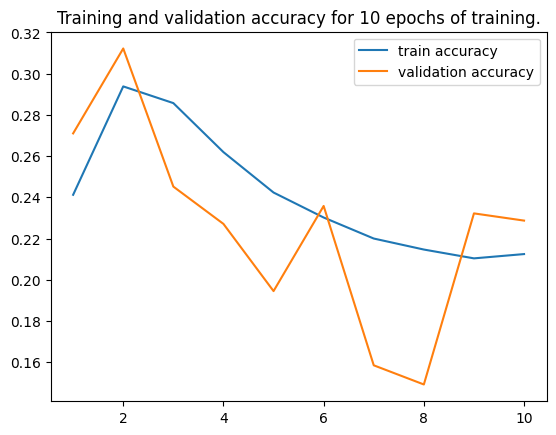

In [12]:
# Train the Neural Network (MLP)

nn_model = model_nn()
config_nn = 'The_MLP_NN' # Give a recognizable name

# The TensorBoard is a feature of tensorflow for the visualization of the training process 
nn_logger = TensorBoard(log_dir='logs/nn_logs/'+config_nn+'/')

nn_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Adam')
history = nn_model.fit(x_train, y_train_categorical, batch_size=64, epochs=10, 
                       validation_data=(x_test, y_test_categorical), 
                       callbacks=[nn_logger], verbose=1)
plot_metric_history(history.history, 'accuracy')

<div class="alert alert-block alert-success">
<b>Task:</b> Use TensorBoard to control your training progress. An explanation on how to open your TensorBoard is given here:
    <a href="https://github.com/tensorflow/tensorboard/blob/master/docs/r1/summaries.md">TensorBoard</a>  (at the bottom of the webpage)
</div>

In [ ]:
# Train the CNN

cnn_model = model_cnn()
config_cnn = 'The_CNN' # give a recognizable name

cnn_logger = TensorBoard(log_dir='logs/cnn_logs/'+config_cnn+'/') 

cnn_model.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer='Adam')
history = cnn_model.fit(x_train, y_train_categorical, batch_size=64, epochs=10, 
                        validation_data=(x_test, y_test_categorical), 
                        callbacks=[cnn_logger], verbose=1)
plot_metric_history(history.history, 'accuracy')

<div class="alert alert-block alert-success">
<b>Question (1 pts):</b> Which network performs better?
</div>

<div class="alert alert-block alert-success">
<b>Your Answer: Obviously, the CNN performs better, with a validation accuracy of [0.3032].</b>
</div>


In [ ]:
nn_model.summary()

<div class="alert alert-block alert-success">
<b>Question (1 pts):</b> How many parameters do the networks have? Therefore use the summary method (see Keras-Docs)...
</div>

<div class="alert alert-block alert-success">
<b>Your Answer: 2,565,152</b> 
</div>

<div class="alert alert-block alert-success">
<b>Question (2 pts):</b> Where are most parameters stored in this CNN?
</div>

<div class="alert alert-block alert-success">
<b>Your Answer: in the first Hidden Layer! 786,688 </b> 
</div>

### 2.4.4 Challenge: Optimize the Network! 

<div class="alert alert-block alert-success">
<b>Task:</b> Try to improve one of the models so that your validation accuracy is higher than 0.75 percent once!

<ul>
<li>Hint: Try to overfit first and then regularize.
<li>Hint2: Therefore use L1/L2 - regularization and/or Dropout. BatchNormalization might improve things as well. Look therefore at Keras website for examples or ask tutors.
<li>Hint3: Use one of the functions <code>def model_nn()</code> or <code>def model_cnn()</code> from above.
<li> Hint4: You are also allowed to increase the number of epochs. Have fun and good Luck!

</li>
</ul>
</div>

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 52ms/step - accuracy: 0.4366 - loss: 1.6756 - val_accuracy: 0.5877 - val_loss: 1.1670
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.6364 - loss: 1.0324 - val_accuracy: 0.6288 - val_loss: 1.1403
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.7026 - loss: 0.8520 - val_accuracy: 0.7291 - val_loss: 0.7857
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0.7363 - loss: 0.7563 - val_accuracy: 0.7478 - val_loss: 0.7408
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.7647 - loss: 0.6900 - val_accuracy: 0.7560 - val_loss: 0.7085
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.7807 - loss: 0.6365 - val_accuracy: 0.7162 - val_loss: 0.8634
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.7926 - loss: 0.6000 - val_accuracy: 0.8005 - val_loss: 0.5863
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.8073 - loss: 0.5570 - 

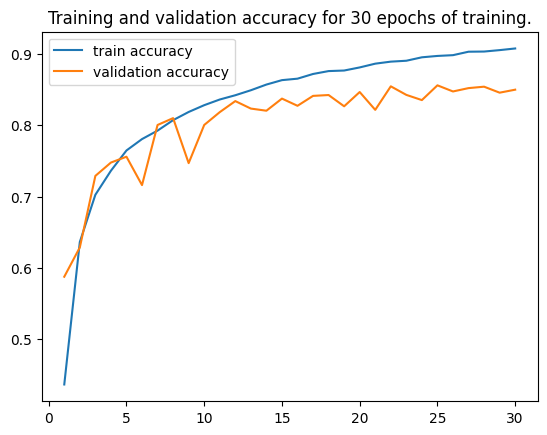


 Best validation accuracy: 0.8561


In [ ]:
# Use this block to train the optimized Network.
# You can copy and paste code from above
# You might also want to look online for good training strategies

### STUDENT CODE HERE (8 pts)


def model_cnn() -> tf.keras.Model:
    return Sequential([
        Input(shape=x_train.shape[1:], name='Input_CNN'),
        
        # Block 1 
        Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', name='Conv1_1'),
        BatchNormalization(),
        Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', name='Conv1_2'), 
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='Pool1'),
        Dropout(0.25),
        
        # Block 2 
        Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', name='Conv2_1'),
        BatchNormalization(),
        Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', name='Conv2_2'), 
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='Pool2'),
        Dropout(0.25),
        
        # Block 3 
        Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', name='Conv3_1'),
        BatchNormalization(),
        Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', name='Conv3_2'),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='Pool3'),
        Dropout(0.25),
        
        # Dense Layers
        Flatten(name='Flatt_CNN'),
        Dense(256, activation='relu', name='FC-1'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(num_classes, activation='softmax', name='Output_CNN')
    ])


cnn_model_optimized = model_cnn()
config_cnn_opt = 'The_CNN_Optimized'
cnn_logger_opt = TensorBoard(log_dir='logs/cnn_logs/'+config_cnn_opt+'/')

cnn_model_optimized.compile(
    loss='categorical_crossentropy', 
    metrics=['accuracy'], 
    optimizer='AdamM'
)


history_opt = cnn_model_optimized.fit(
    x_train, y_train_categorical, 
    batch_size=64, 
    epochs=30,  
    validation_data=(x_test, y_test_categorical), 
    callbacks=[cnn_logger_opt], 
    verbose=1
)

plot_metric_history(history_opt.history, 'accuracy')

print(f"\n Best validation accuracy: {max(history_opt.history['val_accuracy']):.4f}")
### STUDENT CODE until HERE



<div class="alert alert-block alert-success">
<b>Question (2 pts):</b> Describe briefly what you did to improve your network? Name two things.
</div>

<div class="alert alert-block alert-success">
<b>Your Answer: I added a dropout layer and batch normalization, which helped the network perform better and prevented overfitting. (The complete explanation is provided as a comment above.)</b>
</div>

## 2.5 Data Augmentation

Another way to regularize your network is to augment the training data. Use therefore the ImageDataGenerator from Keras. We will later shift and rotate images by ourselves after optimizing on Cifar-10.

In [14]:
# Keras ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

### 2.5.1 Even more challenging ((Bonus Question :)))

<div class="alert alert-block alert-success">
<b>Task:</b> Improve your model and adapt it, how accurate can it get now?
Our solution is able to reach 0.8894 on the validation accuracy.
</div>

In [15]:
def model_cnn_aug() -> tf.keras.Model:
    return Sequential([
        Input(shape=x_train.shape[1:], name='Input_MLP'),
        Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu', name='Conv1'),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='Pool1'),
        Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', name='Conv2'),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='Pool2'),
        Flatten(name='Flatt_CNN'),
        Dense(256, activation='relu', name='FC-1'),
        Dense(num_classes, activation='softmax', name='Output_CNN')
    ])

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.3637 - loss: 1.7495 - val_accuracy: 0.4540 - val_loss: 1.5116
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.4361 - loss: 1.5651 - val_accuracy: 0.4901 - val_loss: 1.4244
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.4428 - loss: 1.5651 - val_accuracy: 0.4714 - val_loss: 1.5418
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step - accuracy: 0.4164 - loss: 1.7371 - val_accuracy: 0.5147 - val_loss: 1.4183
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.3646 - loss: 2.6051 - val_accuracy: 0.3608 - val_loss: 3.5522
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.2771 - loss: 8.2507 - val_accuracy: 0.2999 - val_loss: 11.0004
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.2506 - loss: 18.1282 - val_accuracy: 0.3064 - val_loss: 21.8528
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.2487 - loss: 24.060

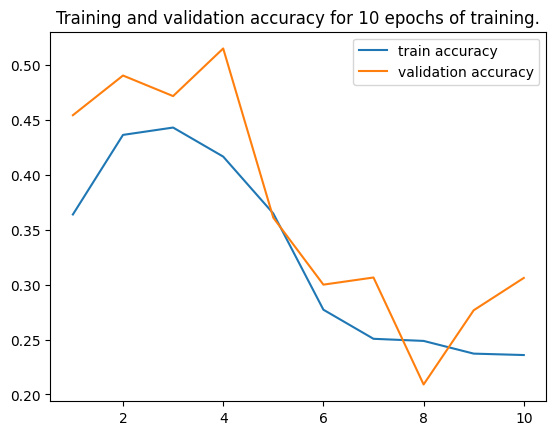

In [ ]:
# Train your model that makes use of data augmentation
# Fit the training data to the data-generator
datagen.fit(x_train)

# Train your CNN_augmentation model:
cnn_aug_model = model_cnn_aug()
cnn_aug_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Adam')
config_cnn_aug = 'HAHAHAH' # give a recognizable name
cnn_logger = TensorBoard(log_dir='logs/cnn_aug_logs/'+config_cnn_aug+'/') 

history = cnn_aug_model.fit(datagen.flow(x_train, y_train_categorical, batch_size=128),
                            epochs=10, validation_data=(x_test, y_test_categorical),
                            callbacks=[cnn_logger], verbose=1)
plot_metric_history(history.history, 'accuracy')

Epoch 1/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 90ms/step - accuracy: 0.3401 - loss: 1.9873 - val_accuracy: 0.2325 - val_loss: 2.3637
Epoch 2/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 104ms/step - accuracy: 0.4657 - loss: 1.5337 - val_accuracy: 0.5223 - val_loss: 1.3657
Epoch 3/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.5378 - loss: 1.2944 - val_accuracy: 0.5741 - val_loss: 1.2903
Epoch 4/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 93ms/step - accuracy: 0.5903 - loss: 1.1597 - val_accuracy: 0.5662 - val_loss: 1.3966
Epoch 5/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.6187 - loss: 1.0839 - val_accuracy: 0.6558 - val_loss: 1.0282
Epoch 6/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.6424 - loss: 1.0185 - val_accuracy: 0.5720 - val_loss: 1.4852
Epoch 7/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 82ms/step - accuracy: 0.6614 - loss: 0.9681 - val_accuracy: 0.6438 - val_loss: 1.1022
Epoch 8/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 109ms/step - accuracy: 0.6774 - loss: 0.9278 

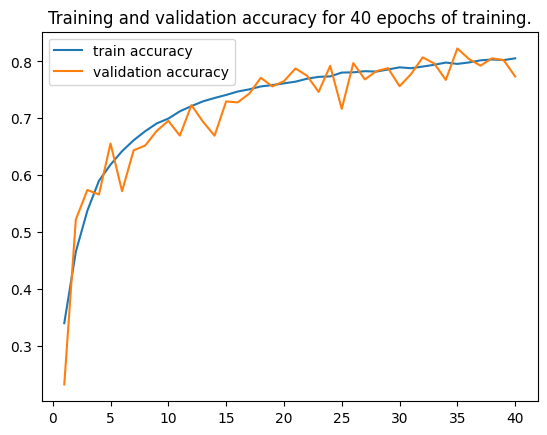


Best validation accuracy: 0.8227


In [19]:

def model_cnn_aug() -> tf.keras.Model:
    return Sequential([
        Input(shape=x_train.shape[1:], name='Input_CNN_Aug'),  
        # Block 1
        Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', name='Conv1_1'),
        BatchNormalization(),
        Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', name='Conv1_2'), 
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='Pool1'),
        Dropout(0.25),
        # Block 2
        Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', name='Conv2_1'),
        BatchNormalization(),
        Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', name='Conv2_2'),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='Pool2'),
        Dropout(0.25),
        # Block 3
        Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', name='Conv3_1'),
        BatchNormalization(),
        Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu', name='Conv3_2'),
        MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid', name='Pool3'),
        Dropout(0.25),
        # Dense Layers
        Flatten(name='Flatt_CNN'),
        Dense(256, activation='relu', name='FC-1'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(num_classes, activation='softmax', name='Output_CNN')
    ])

# Fit the training data to the data-generator
datagen.fit(x_train)

# Train your CNN_augmentation model:
cnn_aug_model_opt = model_cnn_aug() 
cnn_aug_model_opt.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Adam')

config_cnn_aug = 'CNN_with_Augmentation'
cnn_aug_logger = TensorBoard(log_dir='logs/cnn_aug_logs/'+config_cnn_aug+'/') 

history_aug = cnn_aug_model_opt.fit(  
    datagen.flow(x_train, y_train_categorical, batch_size=128),
    epochs=40, 
    validation_data=(x_test, y_test_categorical),
    callbacks=[cnn_aug_logger],
    verbose=1
)

plot_metric_history(history_aug.history, 'accuracy')
print(f"\nBest validation accuracy: {max(history_aug.history['val_accuracy']):.4f}")  

<div class="alert alert-block alert-success">
<b>Question (1 pts):</b> Can you imagine why the ground-truth labels were not augmented in the code cell above and might that be necessary? If the intuition is missing you might come back to this question after you finished the notebook or the implementation of data augmentation down below.  
</div>

<div class="alert alert-block alert-success">
<b>Your Answer: Ja, weil wir nach dem Drehen, verschieben, etc. NICHT das Objekt geändert haben, also bleibt es in seinem ursprünglichen Label erhalten... </b> 
</div>

<div class="alert alert-block alert-success">
<b>Question (1 pts):</b> What do you think happens to images adapted by the DataGenerator?
</div>

<div class="alert alert-block alert-success">
<b>Your Answer: Das ist im Buch Seite 468 erklärt! Ein wenig Verschieben, Drehen und in der Größe ändern. Man kann auch andere Sachen machen, idealerweise soll man nachher nicht in der Lage sein, zu wissen, dass es ein künstliches Bild ist</b> 
</div>

## 2.6 Predict with your model

In [ ]:
# Get the probabilities of one image prediction
x_tester = x_test[0,:,:,:]

# Use numpy expand_dims before predicting with your model
# Print your predicted classes for the first test image (x_test[0,:,:,:])

# STUDENT CODE HERE (2 pts)
# Füge eine Batch-Dimension hinzu: (32, 32, 3) → (1, 32, 32, 3)
x_tester_batch = np.expand_dims(x_tester, axis=0)

pred = cnn_model_optimized.predict(x_tester_batch) 
print("Wahrscheinlichkeiten für jede Klasse:")
print(pred)

predicted_class = np.argmax(pred)
print(f"\nVorhergesagte Klasse: {predicted_class} ({classes[predicted_class]})")

# STUDENT CODE until HERE


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
Wahrscheinlichkeiten für jede Klasse:
[[1.5420544e-06 4.1573057e-06 7.9462652e-06 9.9744248e-01 1.9254533e-06
  1.0580536e-03 1.4831907e-03 3.3050347e-07 1.4551371e-07 2.4224141e-07]]

Vorhergesagte Klasse: 3 (cat)


<div class="alert alert-block alert-success">
<b>Question (1 pts):</b> With how much confidence was image <b>18</b> (index 17) in the test set predicted as a bird by your model?
</div>

<div class="alert alert-block alert-success">
<b>Your Answer:</b> 
</div>

## 2.7 Let's have a closer look / Get the weights in a convolutional layer

In [29]:
# Get the weights of a layer of one of your models, you specified by name
layer_visual = cnn_model_optimized.get_layer('Conv1_1')
weights = layer_visual.get_weights()[0]

# Take some of them, last dimension are the channels
weights_2d = weights[:,:,0,0] # filters are [:,:, dimension of spatial input (e.g.: rgb=3), nb_filters] in a layer
weights_2d

array([[ 0.02739522, -0.15359356,  0.10071477],
       [-0.09048406,  0.11388509, -0.02980134],
       [-0.08264145, -0.0842207 , -0.00483662]], dtype=float32)

<div class="alert alert-block alert-success">
<b>Task:</b> Look at layer Conv2 (or another layer than conv1) and plot one filter-kernel-slice of it's 3rd filter. Hint: Use weights.shape to understand the kernel's dimensions.
</div>

Gewichte Form: (3, 3, 32, 64)
Filter-Slice Form: (3, 3)


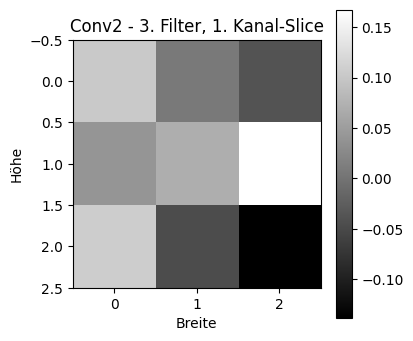


Filter-Werte:
[[ 0.10237016  0.00835887 -0.03889232]
 [ 0.0399712   0.0696049   0.1673577 ]
 [ 0.10725577 -0.04705409 -0.13825862]]


In [ ]:
# Copy and paste necessary code for this Task from above.

### STUDENT CODE HERE (1 pts)
# Hole die Gewichte von Conv2
conv2_layer = cnn_model_optimized.get_layer('Conv2_1')  
weights = conv2_layer.get_weights()[0] 

print(f"Gewichte Form: {weights.shape}")

# Nimm den 3. Filter (Index 2, weil 0-basiert)
# Nimm den 1. Slice davon (der erste Input-Kanal)
filter_3_slice_0 = weights[:, :, 0, 2]  

print(f"Filter-Slice Form: {filter_3_slice_0.shape}")  

# Visualisiere den Filter
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.imshow(filter_3_slice_0, cmap='gray')
plt.colorbar()
plt.title('Conv2 - 3. Filter, 1. Kanal-Slice')
plt.xlabel('Breite')
plt.ylabel('Höhe')
plt.show()

print(f"\nFilter-Werte:\n{filter_3_slice_0}")
### STUDENT CODE until HERE


<div class="alert alert-block alert-success">
<b>Question (2 pts):</b> Explain what the dimensions a,b,c and d are in 'weights[a,b,c,d]' like it is used in the code block above. 
</div>

<div class="alert alert-block alert-success">
<b>Your Answer: a -> Die Höhe des Filters, b -> Die Breite des Filters, c -> Die Tiefe des Filters ( also wie viele Kanäle es hat ), d -> Anzahl der Filter</b> 

</div>

In [1]:
#Load Ascent image from scipy and convolve it with the previous loaded filter
import scipy.datasets
import scipy.signal

ascent = scipy.datasets.ascent()
ascent = scipy.signal.convolve2d(ascent, weights_2d, boundary='symm', mode='same')
# ascent = np.maximum(ascent, 0)
fig, ax = plt.subplots(figsize=(figure_inches, figure_inches))
ax.imshow(ascent, interpolation='nearest', cmap='gray')
plt.tight_layout()

NameError: name 'weights_2d' is not defined

<div class="alert alert-block alert-success">
<b>Task:</b> Use different filters on the input image. Can you notice any differences? (A few words) -> Ja, jeder Filter hebt etwas anderes hervor, einer zum Beispiel vertikale Kanten, der andere Horizontale Kanten, etc. 
</div>

/var/folders/9r/br8vmc6n7qs_ckhp47s0yxlc0000gn/T/ipykernel_35656/1850993351.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


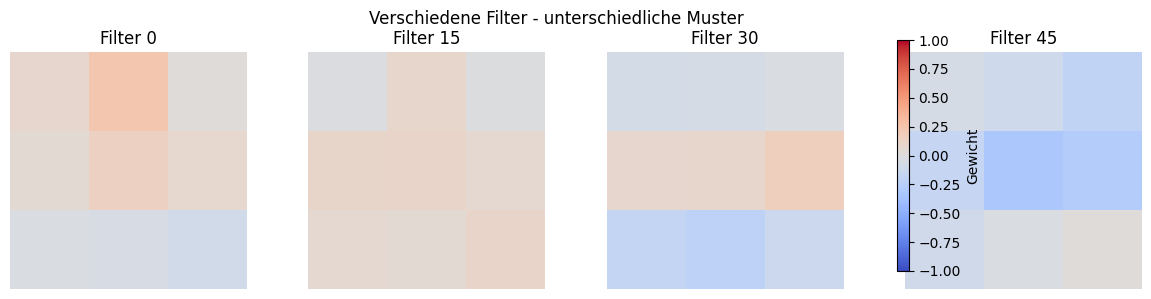

Unterschiede:
- Jeder Filter hat ein anderes Muster von Gewichten gelernt
- Rot = positive Gewichte (reagiert auf helle Pixel)
- Blau = negative Gewichte (reagiert auf dunkle Pixel)
- Zusammen erkennen sie verschiedene Features im Bild


In [ ]:
# Copy and paste the code from above. And use different filters.

# STUDENT CODE HERE (3 pts)
conv2_weights = cnn_model_optimized.get_layer('Conv2_1').get_weights()[0]
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

for i in range(4):
    filter_idx = i * 15 
    filter_kernel = conv2_weights[:, :, 0, filter_idx]
    
    axes[i].imshow(filter_kernel, cmap='coolwarm', vmin=-1, vmax=1)
    axes[i].set_title(f'Filter {filter_idx}')
    axes[i].axis('off')

plt.suptitle('Verschiedene Filter - unterschiedliche Muster')
plt.colorbar(axes[3].images[0], ax=axes, label='Gewicht')
plt.tight_layout()
plt.show()

# Kurze Erklärung für mich später beim Lernen!
print("Unterschiede:")
print("- Jeder Filter hat ein anderes Muster von Gewichten gelernt")
print("- Rot = positive Gewichte (reagiert auf helle Pixel)")
print("- Blau = negative Gewichte (reagiert auf dunkle Pixel)")
print("- Zusammen erkennen sie verschiedene Features im Bild")
# STUDENT CODE until HERE

<div class="alert alert-block alert-success">
<b>Question (2 pts):</b> Explain briefly what you changed in the pasted code.
</div>

<div class="alert alert-block alert-success">
<b>Your Answer: 1. Layer gewechselt, 2. Mehrere Filter gleichzeitig angezeigt,...</b> 
</div>

## 2.8 Visualize the activation in a feedforward pass

In the following code we will directly use the output of the convolutional layer in the CNN and visualize it. This is approximately the same as we did above.  

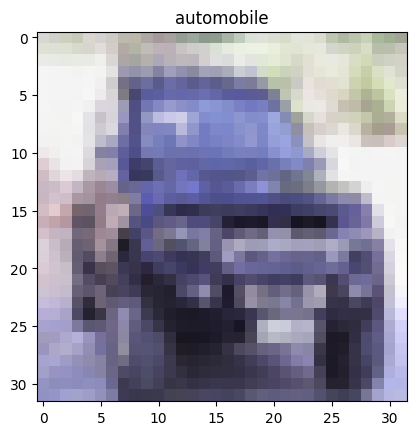

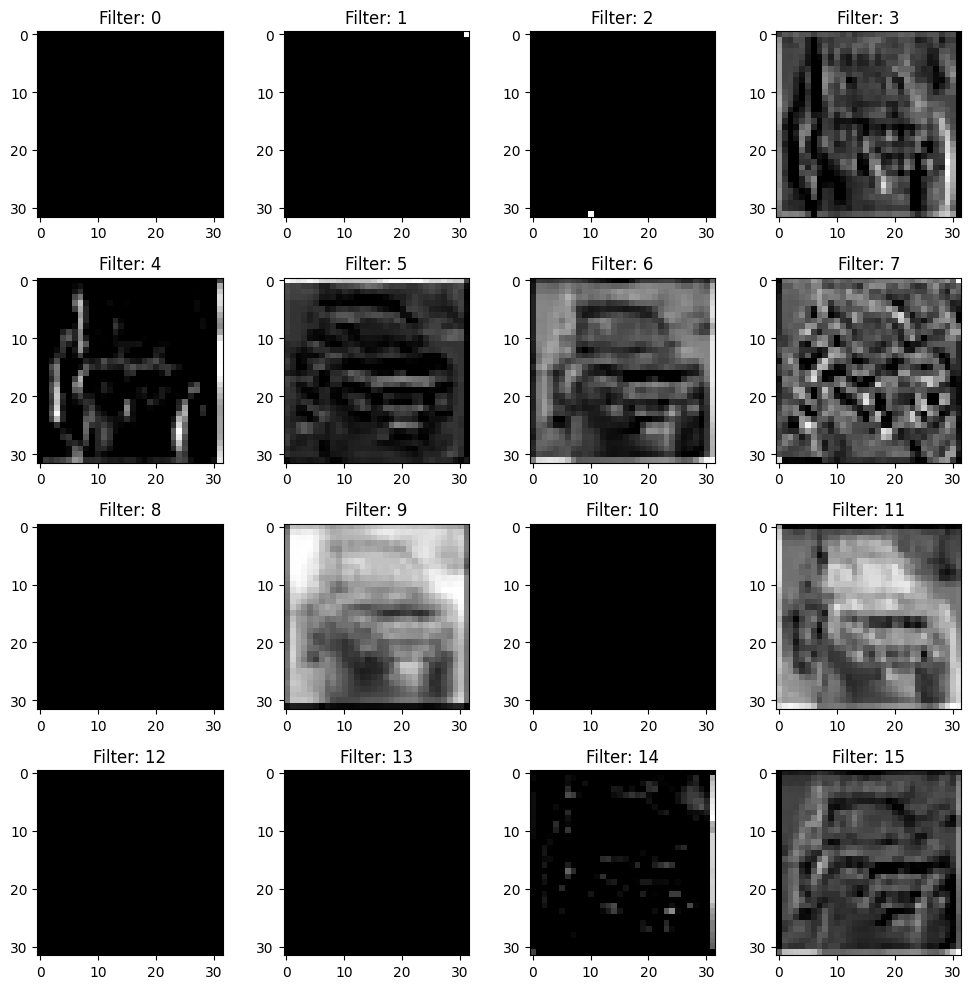

In [34]:
# Get the output in a feedforward process from a model with get_output function
number_sample = 9

def get_output(model, layer_name, model_input):
    """Function to get activations of a given layer after a feedforward pass.
    
    This approach works with Sequential models that may not have been built yet.
    """
    # Create a new functional model by reconstructing layers up to target layer
    input_layer = keras.Input(shape=model_input.shape[1:])
    x = input_layer
    
    # Apply each layer up to and including the target layer
    for layer in model.layers:
        x = layer(x)
        if layer.name == layer_name:
            break
    
    # Create the partial model
    partial_model = keras.Model(inputs=input_layer, outputs=x)
    return partial_model(model_input)

# Model and layer where the feature maps come from
feature_map = get_output(cnn_model_optimized, 'Conv1_1', np.expand_dims(x_test[number_sample,:,:,:],axis=0))

# First print sample
plt.imshow(x_test[number_sample,:,:,:])
plt.title(classes[y_test[number_sample].item()])

# Now plot all filters
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10,10))
axes = ax.flatten()

# Note: it only works for 16 filters, if you want to doodle nrows * ncols
for i, ax in enumerate(axes):
    ax.imshow(feature_map[0,:,:,i], cmap='gray')
    ax.set_title(f"Filter: {i}")

fig.tight_layout()
plt.show()

## Further Reading

[SegmentationForAutonomousDriving](https://blog.playment.io/semantic-segmentation-models-autonomous-vehicles/#U-Net)

[Dropout](http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf)

[BatchNormalization](https://arxiv.org/pdf/1502.03167.pdf)